In [1013]:
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
import seaborn as sns
import pyro
import pyro.distributions as dist

import tqdm

In [1014]:
class ExactGP(gpytorch.models.ExactGP):
            
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel()
        )
                
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [1015]:
N = 1000
input_dim = 1
train_x = None
train_y = None

In [1016]:
# initialise the model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGP(train_x=train_x, train_y=train_y, likelihood=likelihood)

In [1017]:
hypers = {
    'likelihood.noise_covar.noise': torch.tensor(1),
    'covar_module.outputscale': torch.tensor(8.),
    'covar_module.base_kernel.lengthscale': torch.tensor(.2),
}

In [1018]:
model.initialize(**hypers)

torch.manual_seed(55)
X = torch.linspace(0, 1, N)
model.eval()
with gpytorch.settings.prior_mode(True):
    Y = model(X).sample()

/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

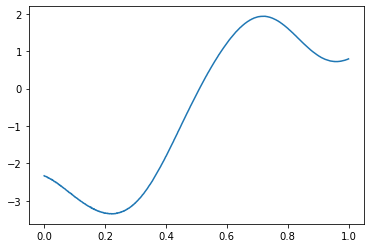

In [1019]:
sns.lineplot(X, Y)

In [1020]:
g_11 = lambda x: 1 / (1 + np.exp(-x))
g_21 = lambda x: np.exp(x)
g_31 = lambda x: x
g_32 = lambda x: np.exp(x)

/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

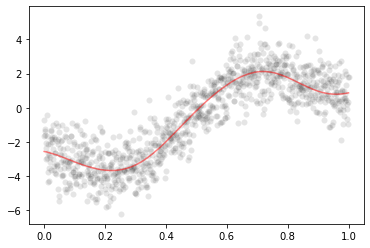

In [1021]:
torch.manual_seed(55)
a_11 = 1.1

# f_11 = a_11*g_11(Y)
# y_1 = torch.bernoulli(f_11)

f_11 = a_11*Y
y_1 = torch.normal(f_11, 1)

sns.lineplot(X, f_11, color='red', alpha=.5)
sns.scatterplot(X, y_1, color='black', alpha=.1)

/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

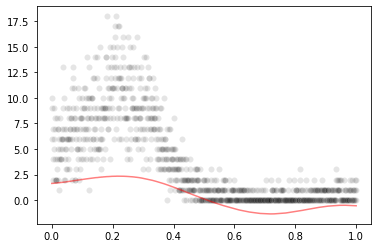

In [1022]:
torch.manual_seed(55)
a_21 = -0.7

# f_21 = a_21*g_21(Y)
# y_2 = torch.poisson(f_21)

f_21 = a_21*Y
# y_2 = torch.normal(f_21, .2)
y_2 = dist.Poisson(f_21.exp())()

sns.lineplot(X, f_21, color='red', alpha=.5)
sns.scatterplot(X, y_2, color='black', alpha=.1)

/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

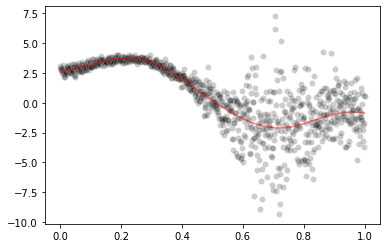

In [1057]:
torch.manual_seed(55)
a_31 = -1.1
a_32 = .55

# f_31 = a_31*g_31(Y)
# f_32 = a_32*g_32(Y)
# y_3 = torch.normal(f_31, f_32)

# sns.scatterplot(X, y_3, color='black', alpha=.2)
# sns.lineplot(X, f_31, color='red', alpha=.5)
# sns.lineplot(X, f_32, color='blue', alpha=.5)

f_31 = a_31*Y
f_32 = a_32*Y
y_3 = torch.normal(f_31, f_32.exp())
# y_3 = torch.normal(f_31, .7)

sns.scatterplot(X, y_3, color='black', alpha=.2)
sns.lineplot(X, f_31, color='red', alpha=.5)

/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

<AxesSubplot:>

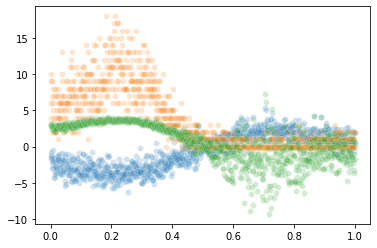

In [1058]:
sns.scatterplot(X, y_1, alpha=.2)
sns.scatterplot(X, y_2, alpha=.2)
sns.scatterplot(X, y_3, alpha=.2)

In [1109]:
num_tasks = 4
num_latents = 1

class MultitaskGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points, name_prefix="lmc_mogp"):
        
        self.name_prefix = name_prefix
        
        # Let's use a different set of inducing points for each latent function
        inducing_points = torch.linspace(0, 1, 16)

        # We have to mark the CholeskyVariationalDistribution as batch
        # so that we learn a variational distribution for each task
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(
            inducing_points.size(-1), batch_shape=torch.Size([num_latents])
        )

        # We have to wrap the VariationalStrategy in a LMCVariationalStrategy
        # so that the output will be a MultitaskMultivariateNormal rather than a batch output
        variational_strategy = gpytorch.variational.LMCVariationalStrategy(
            gpytorch.variational.VariationalStrategy(
                self, inducing_points, variational_distribution, learn_inducing_locations=True
            ),
            num_tasks=num_tasks,
            num_latents=num_latents,
            latent_dim=-1
        )

        super().__init__(variational_strategy=variational_strategy)

        # The mean and covariance modules should be marked as batch
        # so we learn a different set of hyperparameters
        self.mean_module = gpytorch.means.ConstantMean(batch_shape=torch.Size([num_latents]))
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(batch_shape=torch.Size([num_latents])),
            batch_shape=torch.Size([num_latents])
        )

    def forward(self, x):
        # The forward function should be written as if we were dealing with each output
        # dimension in batch
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
    
    def guide(self, x, y):
         # Get q(f) - variational (guide) distribution of latent function
        function_dist = self.pyro_guide(x)
        assert function_dist.batch_shape == (1000,)

        # Use a plate here to mark conditional independencies
        # with pyro.plate(self.name_prefix + ".data_plate", dim=-1):
        with pyro.plate(self.name_prefix + ".data_plate", dim=-1):
            # Sample from latent function distribution
            f = pyro.sample(self.name_prefix + ".f(x)", function_dist)
            
    def model(self, x, y):
        pyro.module(self.name_prefix + ".gp", self)

        # Get p(f) - prior distribution of latent function
        function_dist = self.pyro_model(x)

        # Use a plate here to mark conditional independencies
        # with pyro.plate(self.name_prefix + ".data_plate", dim=-1):
        with pyro.plate(self.name_prefix + ".data_plate", dim=-1):
            # Sample from latent function distribution
            f = pyro.sample(self.name_prefix + ".f(x)", function_dist)
            
            # print(function_samples)
            # Sample from observed distribution
            pyro.sample(
                self.name_prefix + ".y_1",
                dist.Normal(f[...,0], torch.tensor(1.)).to_event(1),
                obs=y[...,0]
            )
            
            pyro.sample(
                self.name_prefix + ".y_2",
                dist.Poisson(f[...,1].exp()).to_event(1),
                obs=y[...,1]
            )
            
            pyro.sample(
                self.name_prefix + ".y_3",
                dist.Normal(f[...,2], f[...,3].exp()).to_event(1),
                obs=y[...,2]
            )
        # print(dist.Normal(function_samples, torch.tensor(1.)).log_prob(y))
            # print(dist.Normal(function_samples, torch.tensor(1.)).shape())

In [1110]:
train_x = X
train_y = torch.stack([y_1, y_2, y_3], dim=-1)
# train_y = torch.stack([y_1, y_2], dim=-1)
# train_y = y_1

In [1111]:
model = MultitaskGPModel(inducing_points=train_x)
# likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=num_tasks)

In [1129]:
pyro.clear_param_store()

num_iter = 200
num_particles = 256

optimizer = pyro.optim.Adam({"lr": 0.1})
# elbo = pyro.infer.Trace_ELBO(num_particles=num_particles, vectorize_particles=True, retain_graph=True)
elbo = pyro.infer.Trace_ELBO(vectorize_particles=True, retain_graph=True)
svi = pyro.infer.SVI(model.model, model.guide, optimizer, elbo)

model.train()
iterator = tqdm.notebook.tqdm(range(num_iter))
loss_list = []
for i in iterator:
    model.zero_grad()
    loss = svi.step(train_x, train_y)
    loss_list.append(loss)
    iterator.set_postfix(loss=loss, lengthscale=model.covar_module.base_kernel.lengthscale.item())

  0%|          | 0/200 [00:00<?, ?it/s]

/home/cao/miniconda3/envs/pytorch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

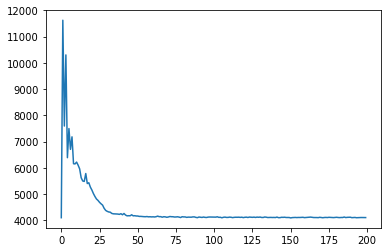

In [1130]:
sns.lineplot(np.arange(0, len(loss_list)), loss_list)

In [1131]:
def percentiles_from_samples(samples, percentiles=[0.05, 0.5, 0.95]):
    num_samples = samples.size(0)
    samples = samples.sort(dim=0)[0]

    # Get samples corresponding to percentile
    percentile_samples = [samples[int(num_samples * percentile)] for percentile in percentiles]

    # Smooth the samples
    kernel = torch.full((1, 1, 5), fill_value=0.2)
    percentiles_samples = [
        torch.nn.functional.conv1d(percentile_sample.view(1, 1, -1), kernel, padding=2).view(-1)
        for percentile_sample in percentile_samples
    ]

    return percentile_samples

In [1132]:
# define test set (optionally on GPU)
denser = 2 # make test set 2 times denser then the training set
test_x = torch.linspace(0, 1, N).float()#.cuda()

model.eval()
with torch.no_grad():
    output = model(test_x)

# Get E[exp(f)] via f_i ~ GP, 1/n \sum_{i=1}^{n} exp(f_i).
# Similarly get the 5th and 95th percentiles
samples = output(torch.Size([1000]))
lower, mean, upper = percentiles_from_samples(samples)

# Draw some simulated y values
mu_sim = model(train_x)()
y_sim = torch.stack(
    [dist.Normal(mu_sim[:,0].detach(), torch.tensor(1.))(),
     dist.Poisson(mu_sim[:,1].detach().exp())(), 
     dist.Normal(mu_sim[:,2].detach(), mu_sim[:,3].detach().exp())()],
    dim=-1
)

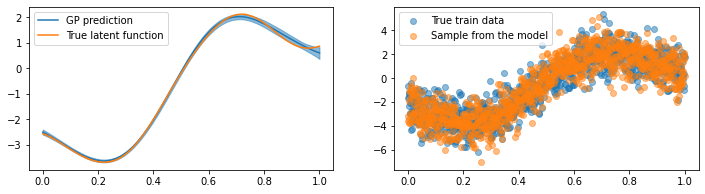

In [1133]:
# visualize the result
fig, (func, samp) = plt.subplots(1, 2, figsize=(12, 3))
line, = func.plot(test_x, mean[:,0].detach().cpu().numpy(), label='GP prediction')
func.fill_between(
    test_x, lower[:,0].squeeze().detach().cpu().numpy(),
    upper[:,0].squeeze().detach().cpu().numpy(), color=line.get_color(), alpha=0.5
)

func.plot(test_x, f_11, label='True latent function')
func.legend()

# sample from p(y|D,x) = \int p(y|f) p(f|D,x) df (doubly stochastic)
samp.scatter(train_x, train_y[:,0], alpha = 0.5, label='True train data')
samp.scatter(train_x, y_sim[:,0].cpu().detach().numpy(), alpha=0.5, label='Sample from the model')
samp.legend()

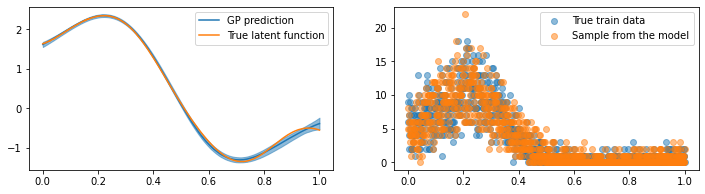

In [1134]:
# visualize the result
fig, (func, samp) = plt.subplots(1, 2, figsize=(12, 3))
line, = func.plot(test_x, mean[:,1].detach().cpu().numpy(), label='GP prediction')
func.fill_between(
    test_x, lower[:,1].squeeze().detach().cpu().numpy(),
    upper[:,1].squeeze().detach().cpu().numpy(), color=line.get_color(), alpha=0.5
)

func.plot(test_x, f_21, label='True latent function')
func.legend()

# sample from p(y|D,x) = \int p(y|f) p(f|D,x) df (doubly stochastic)
samp.scatter(train_x, train_y[:,1], alpha = 0.5, label='True train data')
samp.scatter(train_x, y_sim[:,1].cpu().detach().numpy(), alpha=0.5, label='Sample from the model')
samp.legend()

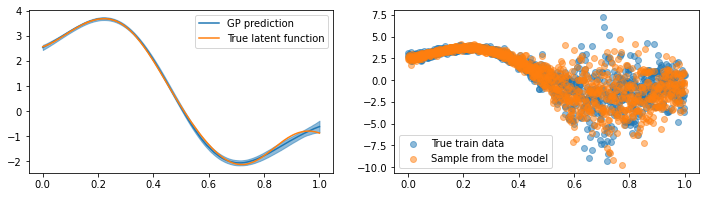

In [1135]:
# visualize the result
fig, (func, samp) = plt.subplots(1, 2, figsize=(12, 3))
line, = func.plot(test_x, mean[:,2].detach().cpu().numpy(), label='GP prediction')
func.fill_between(
    test_x, lower[:,2].squeeze().detach().cpu().numpy(),
    upper[:,2].squeeze().detach().cpu().numpy(), color=line.get_color(), alpha=0.5
)

func.plot(test_x, f_31, label='True latent function')
func.legend()

# sample from p(y|D,x) = \int p(y|f) p(f|D,x) df (doubly stochastic)
samp.scatter(train_x, train_y[:,2], alpha = 0.5, label='True train data')
samp.scatter(train_x, y_sim[:,2].cpu().detach().numpy(), alpha=0.5, label='Sample from the model')
samp.legend()

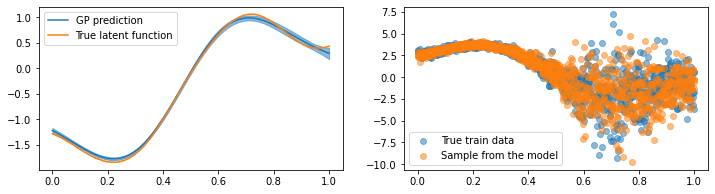

In [1136]:
# visualize the result
fig, (func, samp) = plt.subplots(1, 2, figsize=(12, 3))
line, = func.plot(test_x, mean[:,3].detach().cpu().numpy(), label='GP prediction')
func.fill_between(
    test_x, lower[:,3].squeeze().detach().cpu().numpy(),
    upper[:,3].squeeze().detach().cpu().numpy(), color=line.get_color(), alpha=0.5
)

func.plot(test_x, f_32, label='True latent function')
func.legend()

# sample from p(y|D,x) = \int p(y|f) p(f|D,x) df (doubly stochastic)
samp.scatter(train_x, train_y[:,2], alpha = 0.5, label='True train data')
samp.scatter(train_x, y_sim[:,2].cpu().detach().numpy(), alpha=0.5, label='Sample from the model')
samp.legend()

In [1137]:
# true lmc_coeff = [1.1, -0.7, -1.1, .55]
model.variational_strategy.lmc_coefficients

Parameter containing:
tensor([[ 1.3430, -0.8676, -1.3635,  0.6555]], requires_grad=True)

In [1138]:
# unit lmc coefficient vector is more interpretable
# we can compare this with the lmc coefficient vector from torch model
lmc_coeff = np.array([a_11, a_21, a_31, a_32])
lmc_coeff / np.sqrt(np.sum(lmc_coeff**2))

array([ 0.61372119, -0.39054985, -0.61372119,  0.30686059])

In [1139]:
# unit lmc coefficient vector is more interpretable
model.variational_strategy.lmc_coefficients.detach() / torch.norm(model.variational_strategy.lmc_coefficients.detach())

tensor([[ 0.6101, -0.3942, -0.6195,  0.2978]])